In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Fetch the absolute path of the file
file_path = os.path.abspath('heart.csv')

In [3]:
df = pd.read_csv(file_path)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

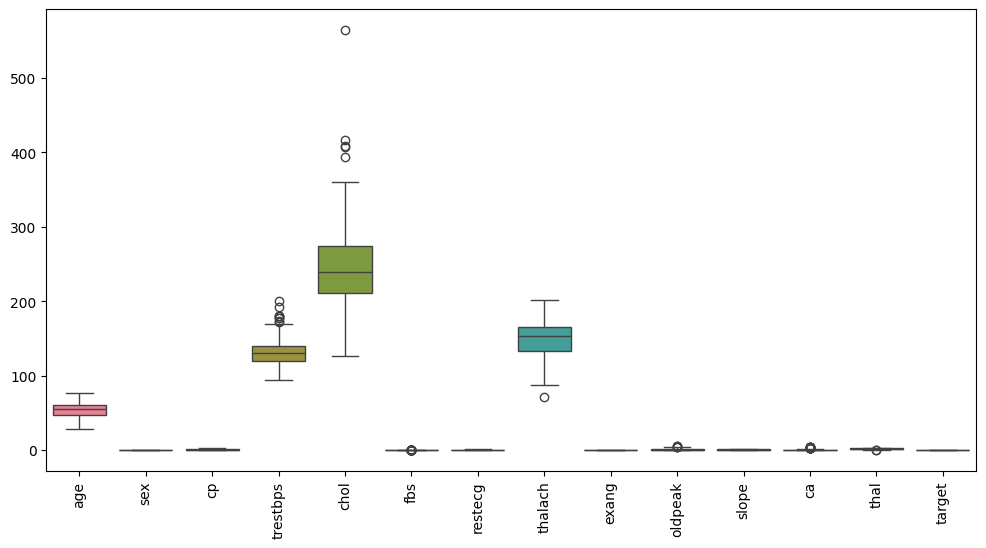

In [9]:
plt.figure(figsize=(12, 6))
# Create a box plot for each column
sns.boxplot(data=df,orient='v')
plt.xticks(rotation=90)
plt.show()

In [10]:
# Calculate the lower and upper bounds for winsorization
trestbps_upper_bound = np.percentile(df['trestbps'], 99)  # 99th percentile
chol_upper_bound = np.percentile(df['chol'], 99)  # 99th percentile
thalach_lower_bound = np.percentile(df['thalach'], 1)  # 1st percentile

# Apply winsorization
df['trestbps'] = np.where(df['trestbps'] > trestbps_upper_bound, trestbps_upper_bound, df['trestbps'])
df['chol'] = np.where(df['chol'] > chol_upper_bound, chol_upper_bound, df['chol'])
df['thalach'] = np.where(df['thalach'] < thalach_lower_bound, thalach_lower_bound, df['thalach'])

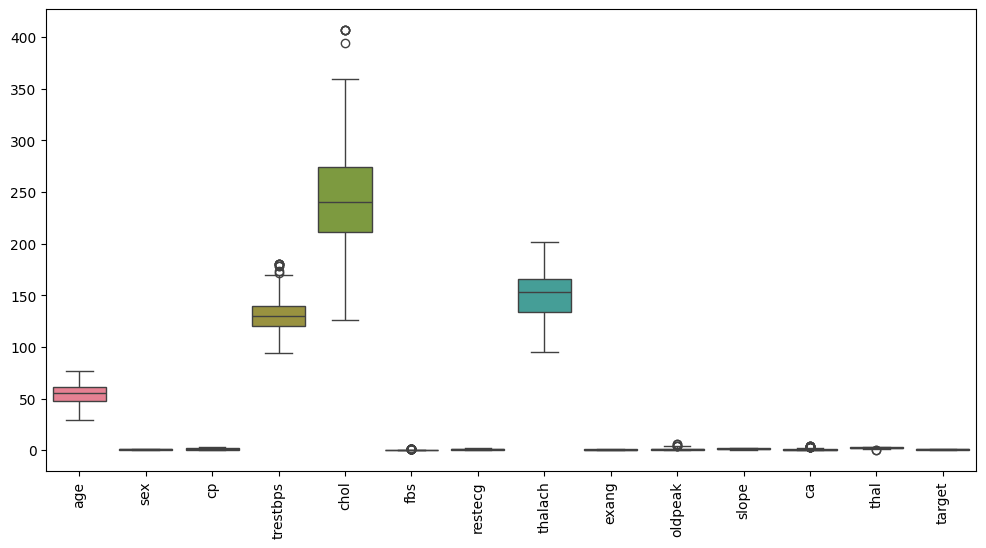

In [11]:
plt.figure(figsize=(12, 6))
# Create a box plot for each column
sns.boxplot(data=df,orient='v')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Function to count outliers in each column
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = outliers.shape[0]
    return outliers_count

In [13]:
# Count the number of outliers in each column
outliers_count = count_outliers(df, df.columns)
print("Number of outliers in each column:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

Number of outliers in each column:
age: 0
sex: 0
cp: 0
trestbps: 9
chol: 5
fbs: 45
restecg: 0
thalach: 0
exang: 0
oldpeak: 5
slope: 0
ca: 25
thal: 2
target: 0


In [14]:
# Count zero values in each column
zero_df = df.drop('target', axis=1)
zero_counts = (zero_df == 0).sum()

# Print the counts of zero values for all columns
print("Counts of zero values in each column:")
print(zero_counts)

Counts of zero values in each column:
age           0
sex          96
cp          143
trestbps      0
chol          0
fbs         258
restecg     147
thalach       0
exang       204
oldpeak      99
slope        21
ca          175
thal          2
dtype: int64


In [15]:
X = df.drop('target', axis=1)
y = df['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
print(X.shape, X_train_scaled.shape, X_test_scaled.shape)

(303, 13) (242, 13) (61, 13)


In [19]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
lr_train_predictions = lr_model.predict(X_train_scaled)
lr_train_accuracy = accuracy_score(y_train, lr_train_predictions)
lr_train_precision = precision_score(y_train, lr_train_predictions, average='binary')
lr_train_recall = recall_score(y_train, lr_train_predictions, average='binary')

lr_test_predictions = lr_model.predict(X_test_scaled)
lr_test_accuracy = accuracy_score(y_test, lr_test_predictions)
lr_test_precision = precision_score(y_test, lr_test_predictions, average='binary')
lr_test_recall = recall_score(y_test, lr_test_predictions, average='binary')

In [21]:
svc_model = svm.SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [22]:
svc_train_predictions = svc_model.predict(X_train_scaled)
svc_train_accuracy = accuracy_score(y_train, svc_train_predictions)
svc_train_precision = precision_score(y_train, svc_train_predictions, average='binary')
svc_train_recall = recall_score(y_train, svc_train_predictions, average='binary')

svc_test_predictions = svc_model.predict(X_test_scaled)
svc_test_accuracy = accuracy_score(y_test, svc_test_predictions)
svc_test_precision = precision_score(y_test, svc_test_predictions, average='binary')
svc_test_recall = recall_score(y_test, svc_test_predictions, average='binary')

In [23]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [24]:
rf_train_predictions = rf_model.predict(X_train_scaled)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_train_precision = precision_score(y_train, rf_train_predictions, average='binary')
rf_train_recall = recall_score(y_train, rf_train_predictions, average='binary')

rf_test_predictions = rf_model.predict(X_test_scaled)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions, average='binary')
rf_test_recall = recall_score(y_test, rf_test_predictions, average='binary')

In [25]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
xgb_train_predictions = xgb_model.predict(X_train_scaled)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_predictions)
xgb_train_precision = precision_score(y_train, xgb_train_predictions, average='binary')
xgb_train_recall = recall_score(y_train, xgb_train_predictions, average='binary')

xgb_test_predictions = xgb_model.predict(X_test_scaled)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)
xgb_test_precision = precision_score(y_test, xgb_test_predictions, average='binary')
xgb_test_recall = recall_score(y_test, xgb_test_predictions, average='binary')

In [27]:
# On training data
print(f"LR Accuracy: {lr_train_accuracy}, Precision: {lr_train_precision}, Recall: {lr_train_recall}")
print(f"SVC Accuracy: {svc_train_accuracy}, Precision: {svc_train_precision}, Recall: {svc_train_recall}")
print(f"RFC Accuracy: {rf_train_accuracy}, Precision: {rf_train_precision}, Recall: {rf_train_recall}")
print(f"XGB Accuracy: {xgb_train_accuracy}, Precision: {xgb_train_precision}, Recall: {xgb_train_recall}")

LR Accuracy: 0.8636363636363636, Precision: 0.8472222222222222, Recall: 0.9172932330827067
SVC Accuracy: 0.871900826446281, Precision: 0.8493150684931506, Recall: 0.9323308270676691
RFC Accuracy: 1.0, Precision: 1.0, Recall: 1.0
XGB Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [28]:
# On testing data
print(f"LR Accuracy: {lr_test_accuracy}, Precision: {lr_test_precision}, Recall: {lr_test_recall}")
print(f"SVC Accuracy: {svc_test_accuracy}, Precision: {svc_test_precision}, Recall: {svc_test_recall}")
print(f"RFC Accuracy: {rf_test_accuracy}, Precision: {rf_test_precision}, Recall: {rf_test_recall}")
print(f"XGB Accuracy: {xgb_test_accuracy}, Precision: {xgb_test_precision}, Recall: {xgb_test_recall}")

LR Accuracy: 0.8524590163934426, Precision: 0.8709677419354839, Recall: 0.84375
SVC Accuracy: 0.8688524590163934, Precision: 0.875, Recall: 0.875
RFC Accuracy: 0.8688524590163934, Precision: 0.8529411764705882, Recall: 0.90625
XGB Accuracy: 0.819672131147541, Precision: 0.8620689655172413, Recall: 0.78125


In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters for Random Forest
best_rf = grid_search_rf.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [31]:
# XGBoost Hyperparameter Tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_model = xgb.XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_scaled, y_train)

# Best parameters for XGBoost
best_xgb = grid_search_xgb.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [32]:
rf_train_predictions = best_rf.predict(X_train_scaled)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_train_precision = precision_score(y_train, rf_train_predictions, average='binary')
rf_train_recall = recall_score(y_train, rf_train_predictions, average='binary')

rf_test_predictions = best_rf.predict(X_test_scaled)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions, average='binary')
rf_test_recall = recall_score(y_test, rf_test_predictions, average='binary')

In [33]:
xgb_train_predictions = best_xgb.predict(X_train_scaled)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_predictions)
xgb_train_precision = precision_score(y_train, xgb_train_predictions, average='binary')
xgb_train_recall = recall_score(y_train, xgb_train_predictions, average='binary')

xgb_test_predictions = best_xgb.predict(X_test_scaled)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)
xgb_test_precision = precision_score(y_test, xgb_test_predictions, average='binary')
xgb_test_recall = recall_score(y_test, xgb_test_predictions, average='binary')

In [34]:
# On training data
print(f"LR Accuracy: {lr_train_accuracy}, Precision: {lr_train_precision}, Recall: {lr_train_recall}")
print(f"SVC Accuracy: {svc_train_accuracy}, Precision: {svc_train_precision}, Recall: {svc_train_recall}")
print(f"RFC Accuracy: {rf_train_accuracy}, Precision: {rf_train_precision}, Recall: {rf_train_recall}")
print(f"XGB Accuracy: {xgb_train_accuracy}, Precision: {xgb_train_precision}, Recall: {xgb_train_recall}")

LR Accuracy: 0.8636363636363636, Precision: 0.8472222222222222, Recall: 0.9172932330827067
SVC Accuracy: 0.871900826446281, Precision: 0.8493150684931506, Recall: 0.9323308270676691
RFC Accuracy: 0.9173553719008265, Precision: 0.900709219858156, Recall: 0.9548872180451128
XGB Accuracy: 0.9545454545454546, Precision: 0.9485294117647058, Recall: 0.9699248120300752


In [35]:
# On testing data
print(f"LR Accuracy: {lr_test_accuracy}, Precision: {lr_test_precision}, Recall: {lr_test_recall}")
print(f"SVC Accuracy: {svc_test_accuracy}, Precision: {svc_test_precision}, Recall: {svc_test_recall}")
print(f"RFC Accuracy: {rf_test_accuracy}, Precision: {rf_test_precision}, Recall: {rf_test_recall}")
print(f"XGB Accuracy: {xgb_test_accuracy}, Precision: {xgb_test_precision}, Recall: {xgb_test_recall}")

LR Accuracy: 0.8524590163934426, Precision: 0.8709677419354839, Recall: 0.84375
SVC Accuracy: 0.8688524590163934, Precision: 0.875, Recall: 0.875
RFC Accuracy: 0.8852459016393442, Precision: 0.8787878787878788, Recall: 0.90625
XGB Accuracy: 0.8360655737704918, Precision: 0.8666666666666667, Recall: 0.8125


In [36]:
# Evaluate on training set
models = {
    'LR': lr_model,
    'SVC': svc_model,
    'RF': best_rf,
    'XGB': best_xgb
}

In [37]:
for name, model in models.items():
    train_predictions = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_precision = precision_score(y_train, train_predictions, average='binary')
    train_recall = recall_score(y_train, train_predictions, average='binary')
    
    print(f'Training set: {name} - Accuracy: {train_accuracy}, Precision: {train_precision}, Recall: {train_recall}')

print()
# Evaluate on testing set
for name, model in models.items():
    test_predictions = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, average='binary')
    test_recall = recall_score(y_test, test_predictions, average='binary')
    print(f'Testing set: {name} - Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}')

Training set: LR - Accuracy: 0.8636363636363636, Precision: 0.8472222222222222, Recall: 0.9172932330827067
Training set: SVC - Accuracy: 0.871900826446281, Precision: 0.8493150684931506, Recall: 0.9323308270676691
Training set: RF - Accuracy: 0.9173553719008265, Precision: 0.900709219858156, Recall: 0.9548872180451128
Training set: XGB - Accuracy: 0.9545454545454546, Precision: 0.9485294117647058, Recall: 0.9699248120300752

Testing set: LR - Accuracy: 0.8524590163934426, Precision: 0.8709677419354839, Recall: 0.84375
Testing set: SVC - Accuracy: 0.8688524590163934, Precision: 0.875, Recall: 0.875
Testing set: RF - Accuracy: 0.8852459016393442, Precision: 0.8787878787878788, Recall: 0.90625
Testing set: XGB - Accuracy: 0.8360655737704918, Precision: 0.8666666666666667, Recall: 0.8125


In [38]:
# Function to make predictions with all models
def predict_heart_disease(input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    input_data_scaled = scaler.transform(input_data_reshaped)
    
    models = {
        'LR': lr_model,
        'SVC': svc_model,
        'RF': best_rf,
        'XGB': best_xgb
    }
    
    for name, model in models.items():
        prediction = model.predict(input_data_scaled)
        print(f'{name} Prediction: {"Defective Heart" if prediction[0] == 1 else "Healthy Heart"}')

# Example input data
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
predict_heart_disease(input_data)

LR Prediction: Healthy Heart
SVC Prediction: Healthy Heart
RF Prediction: Healthy Heart
XGB Prediction: Healthy Heart


C:\Users\hrish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
import joblib

In [40]:
joblib.dump(best_rf, 'heart_disease.pkl')
joblib.dump(scaler, 'scaler_heart.pkl')

['scaler_heart.pkl']

In [41]:
# Fetch the absolute path of the file
ml_file_path = os.path.abspath('heart_disease.pkl')
scaler_file_path = os.path.abspath('scaler_heart.pkl')

In [44]:
heart_disease_model = joblib.load(ml_file_path)
heart_disease_scaler = joblib.load(scaler_file_path)

In [45]:
# Function to make predictions with all models
def predict_heart_disease(input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    input_data_scaled = heart_disease_scaler.transform(input_data_reshaped)
    
    
    prediction = heart_disease_model.predict(input_data_scaled)
    print(f'Prediction: {"Defective Heart" if prediction[0] == 1 else "Healthy Heart"}')

# Example input data
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
predict_heart_disease(input_data)

Prediction: Healthy Heart


C:\Users\hrish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
